In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import urllib.parse
import requests
from datetime import datetime

In [2]:
PT0=  pd.read_csv('Parking_Tags_Data_2020.000.csv')
PT1=  pd.read_csv('Parking_Tags_Data_2020.001.csv')
PT2=  pd.read_csv('Parking_Tags_Data_2020.002.csv')
PT3=  pd.read_csv('Parking_Tags_Data_2020.003.csv')
PT4=  pd.read_csv('Parking_Tags_Data_2020.004.csv')
PT5=  pd.read_csv('Parking_Tags_Data_2020.005.csv')

In [79]:
PT0.head(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,1.0,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,164 GLENHOLME AVE,NaN,NaN,ON


In [4]:
PT_test = (PT0, PT1, PT2, PT3, PT4, PT5)
PT = pd.concat(PT_test, ignore_index = True)
PT.count()

tag_number_masked         1403663
date_of_infraction        1403663
infraction_code           1403663
infraction_description    1403663
set_fine_amount           1403663
time_of_infraction        1402368
location1                 1227008
location2                 1403544
location3                   99349
location4                   99736
province                  1403663
dtype: int64

In [5]:
#What are the top 20 ticket infractions (frequency)
ind = PT['infraction_description'].value_counts().head(20)
ind

PARK ON PRIVATE PROPERTY          338193
PARK MACHINE-REQD FEE NOT PAID    215036
PARK-SIGNED HWY-PROHIBIT DY/TM    204649
PARK PROHIBITED TIME NO PERMIT    161725
STOP-SIGNED HWY-PROHIBIT TM/DY     69283
PARK - LONGER THAN 3 HOURS         67394
STAND VEH.-PROHIBIT TIME/DAY       43252
PARK-SIGNED HWY-EXC PERMT TIME     39761
PARK ON MUNICIPAL PROPERTY         38831
PARK-VEH. W/O VALID ONT PLATE      27665
PARK-N.YORK 2AM-6AM DEC1-MAR31     24118
STOP-SIGNED HIGHWAY-RUSH HOUR      19526
PARK-WITHIN 3M OF FIRE HYDRANT     16316
PARK COMMERC LOAD ZONE NOT LDG     13470
PARK IN A FIRE ROUTE               10510
STAND SIGNED TRANSIT STOP           9891
PARKING MACH-NOT USED/NO FEE        8065
STOP-(ON/OVER) (SIDEWK/FTPATH)      7588
PARK-SIGNED HWY-PUBLIC LANE         7483
PARK CONTRARY POSTED CONDITION      7077
Name: infraction_description, dtype: int64

In [6]:
# Top 20 ticket infractions (revenue)

r20 = np.empty(20)

r20ind = ind.index
r20ind[0]

i = 0

while i < 20:
    r20[i] = PT[PT['infraction_description'] == r20ind[i]]['set_fine_amount'].sum()
    r20[i]
    i = i + 1

In [7]:
r20.sum()

61379140.0

In [8]:
#Total revenue for all tickets
PT['set_fine_amount'].value_counts().head(20)

30     840960
50     222136
100    145040
40     117328
150     49711
250     10510
450      9804
60       7303
90        515
0         153
300       133
15         46
55         22
175         2
Name: set_fine_amount, dtype: int64

In [9]:
#Total revenue for all tickets
Rev20 = PT['set_fine_amount'].value_counts().head(20)
rev = Rev20.index * Rev20
Torev = np.sum(rev)
Torev

70555350

In [10]:
GP19=  pd.read_csv('green-p-parking-2019.csv')
GP15=  pd.read_csv('green-p-parking-2015.csv')

In [11]:
GP_test = (GP19, GP15)
GP = pd.concat(GP_test, ignore_index = True, sort = False)


In [12]:
GP.columns

Index(['id', 'slug', 'address', 'lat', 'lng', 'rate', 'carpark_type',
       'carpark_type_str', 'is_ttc', 'is_under_construction', 'changing_rates',
       'rate_half_hour', 'capacity', 'max_height', 'bike_racks',
       'payment_methods__001', 'payment_methods__002', 'payment_methods__003',
       'payment_methods__004', 'payment_options__001', 'payment_options__002',
       'payment_options__003', 'rate_details__periods__title',
       'rate_details__periods__rates__when',
       'rate_details__periods__rates__rate',
       'rate_details__periods__notes__001', 'monthly_permit_status',
       'monthly_permit_quantity', 'monthly_permit_price', 'map_marker_logo',
       'alert_box', 'enable_streetview', 'streetview_lat', 'streetview_long',
       'streetview_yaw', 'streetview_pitch', 'streetview_zoom',
       'payment_options__004', 'rate_details__periods__notes__002',
       'rate_details__periods__notes__003', 'rate_details__addenda__-',
       'payment_methods', 'payment_options',
 

In [13]:
#cleaning the NAN value by removing the unnecessary attributes for this assignement
GP = GP[['id', 'address', 'lat', 'lng', 'rate', 'carpark_type',
       'carpark_type_str', 'is_ttc', 'is_under_construction', 
       'capacity', 'max_height', 'bike_racks',
       'rate_details__periods__rates__when',
       'rate_details__periods__rates__rate',
       'map_marker_logo',
       'enable_streetview', ]]
GP = GP.dropna()
GP.head(10)

,id,address,lat,lng,rate,carpark_type,carpark_type_str,is_ttc,is_under_construction,capacity,max_height,bike_racks,rate_details__periods__rates__when,rate_details__periods__rates__rate,map_marker_logo,enable_streetview
0,1.0,20 Charles Street East,43.669282,-79.385289,$2.50 / Half Hour,garage,Garage,False,False,641.0,2.00,available,Day Maximum (7am - 6pm),$14.00,greenp_only,yes
2,3.0,13 Isabella Street,43.667577,-79.384707,$3.00 / Half Hour,surface,Surface,False,False,33.0,0.00,not available,Day Maximum (7am - 6pm),NO MAXIMUM,greenp_only,yes
7,11.0,21 Pleasant Blvd.,43.687092,-79.392850,$3.00 / Half Hour,garage,Garage,False,False,557.0,1.90,available,Day Maximum (7am - 6pm),$14.00,greenp_only,yes
9,12.0,30 Alvin Avenue,43.689191,-79.392700,$3.50 / Half Hour,surface,Surface,False,False,188.0,2.67,available,Night Maximum (6pm - 6am),$6.00,greenp_only,yes
10,13.0,20 Delisle Avenue,43.689000,-79.395586,$3.00 / Half Hour,garage,Garage,False,False,238.0,2.10,available,Day Maximum (7am - 6pm),$15.00,greenp_only,yes
17,18.0,351 Keele Street,43.664581,-79.463993,$1.50 / Half Hour,surface,Surface,False,False,77.0,0.00,available,Day Maximum (7am - 6pm),$6.00,greenp_only,yes
19,19.0,385 Pacific Avenue,43.664736,-79.468124,$1.50 / Half Hour,surface,Surface,False,False,71.0,0.00,available,Day Maximum (7am - 6pm),$9.00,greenp_only,yes
21,20.0,101 Cedarvale Avenue,43.686541,-79.310957,$1.50 / Half Hour,surface,Surface,False,False,37.0,0.00,available,Day Maximum (7am - 6pm),$7.00,greenp_only,yes
23,21.0,72 Amroth Avenue,43.685377,-79.311708,$1.50 / Half Hour,surface,Surface,False,False,54.0,0.00,available,Day Maximum (7am - 6pm),$6.00,greenp_only,yes
25,26.0,37 Queen Street East,43.652705,-79.377218,$3.50 / Half Hour,garage,Garage,False,False,620.0,2.00,not available,Night Maximum (6 pm - 7 am),$7.00,greenp_only,yes


In [14]:
PT = PT[['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
        'location2',  'location4', 'province']]


In [15]:
PT = PT[PT['province'] == 'ON']
# Geographic distribution (location) of top 20 infractions (count)
T20 = PT.tail(20)
T20.to_excel(r'C:\Users\niahmad\OneDrive - Publicis Groupe\Documents\Nizam\Python\Udemy Python\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting\COT\T20.xlsx', index = False)
T20['location2']


1403642           88 BLUE JAYS WAY
1403643           88 BLUE JAYS WAY
1403644               BREMNER BLVD
1403645                  70 BAY ST
1403646                  70 BAY ST
1403647               BREMNER BLVD
1403649               BREMNER BLVD
1403650             8 GOD STONE RD
1403651              42 WINEVA AVE
1403652            245 WAVERLEY RD
1403653             30 FIELDWAY RD
1403654    71 JOHN PERKINS BULL DR
1403655          35 BASTION STREET
1403656               BREMNER BLVD
1403657                 14 YORK ST
1403658             325 BOGERT AVE
1403659                12 YONGE ST
1403660             40 PANORAMA CT
1403661            155 REDPATH AVE
1403662                        NaN
Name: location2, dtype: object

In [16]:
test = PT[PT['location2'] == '573 CLENDENAN AVE']['date_of_infraction']
test


1          20200101
2          20200101
1004098    20201006
1004100    20201006
Name: date_of_infraction, dtype: int64

In [17]:
cl = pd.read_csv('calendar.csv')
cl.head(10)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,1,1,1,1,1,0,0,20210328,20210508
1,2,0,0,0,0,0,1,0,20210328,20210508
2,3,0,0,0,0,0,0,1,20210328,20210508
3,4,0,0,0,0,0,0,0,20210328,20210508
4,401,0,0,0,0,0,0,0,20210328,20210508
5,501,0,0,0,0,0,0,0,20210328,20210508


In [18]:
cld = pd.read_csv('calendar_dates.csv')
cld.head(20)

,service_id,date,exception_type
0,401,20210329,1
1,501,20210329,1
2,401,20210330,1
3,501,20210330,1
4,401,20210331,1
5,501,20210331,1
6,401,20210401,1
7,501,20210401,1
8,4,20210402,1
9,1,20210402,2


In [19]:
rt = pd.read_csv('routes.csv')

In [20]:
rt.head(10)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,63083,1,1,LINE 1 (YONGE-UNIVERSITY),NaN,1,NaN,D5C82B,0
1,62881,1,10,VAN HORNE,NaN,3,NaN,FF0000,FFFFFF
2,62882,1,100,FLEMINGDON PARK,NaN,3,NaN,FF0000,FFFFFF
3,62883,1,101,DOWNSVIEW PARK,NaN,3,NaN,FF0000,FFFFFF
4,62884,1,102,MARKHAM RD.,NaN,3,NaN,FF0000,FFFFFF
5,62885,1,104,FAYWOOD,NaN,3,NaN,FF0000,FFFFFF
6,62886,1,105,DUFFERIN NORTH,NaN,3,NaN,FF0000,FFFFFF
7,62887,1,106,SENTINEL,NaN,3,NaN,FF0000,FFFFFF
8,62888,1,107,ST REGIS,NaN,3,NaN,FF0000,FFFFFF
9,62889,1,108,DRIFTWOOD,NaN,3,NaN,FF0000,FFFFFF


In [21]:
st = pd.read_csv('stops.csv')

In [22]:
st.columns

Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'zone_id', 'stop_url', 'location_type', 'parent_station',
       'stop_timezone', 'wheelchair_boarding'],
      dtype='object')

In [23]:
st = st[['stop_id', 'stop_code', 'stop_name', 'stop_lat',
       'stop_lon', 'wheelchair_boarding']]
st.head(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,262,662,DANFORTH RD AT KENNEDY RD,43.714379,-79.260939,2
1,263,929,DAVENPORT RD AT BEDFORD RD,43.674448,-79.399659,1
2,264,940,DAVENPORT RD AT DUPONT ST,43.675511,-79.401938,2
3,265,1871,DAVISVILLE AVE AT CLEVELAND ST,43.702088,-79.378112,1
4,266,11700,DISCO RD AT ATTWELL DR,43.701362,-79.594843,1
5,267,3478,DISCO RD AT ATTWELL DR,43.701043,-79.595806,1
6,268,3479,DISCO RD AT CARLINGVIEW DR EAST SIDE,43.699810,-79.600769,1
7,269,3480,DISCO RD AT CARLINGVIEW DR,43.699929,-79.601176,1
8,270,14258,DON MILLS RD AT EGLINTON AVE EAST,43.720674,-79.339121,1
9,271,9125,DON MILLS RD AT EGLINTON AVE EAST NORTH SIDE,43.721373,-79.338926,1


In [24]:
S20 = st[['stop_lat','stop_lon']]

S20 = S20.head(20)
S20.to_excel(r'C:\Users\niahmad\OneDrive - Publicis Groupe\Documents\Nizam\Python\Udemy Python\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting\COT\S20.xlsx', index = False)
S20.head(10)

,stop_lat,stop_lon
0,43.714379,-79.260939
1,43.674448,-79.399659
2,43.675511,-79.401938
3,43.702088,-79.378112
4,43.701362,-79.594843
5,43.701043,-79.595806
6,43.699810,-79.600769
7,43.699929,-79.601176
8,43.720674,-79.339121
9,43.721373,-79.338926


In [25]:
tp = pd.read_csv('trips.csv')
tp.head(10)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,62881,1,41835437,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806076,858154,1,1
1,62881,1,41835411,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806073,858154,1,1
2,62881,1,41835436,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806076,858155,1,1
3,62881,1,41835444,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806073,858155,1,1
4,62881,1,41835441,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806076,858155,1,1
5,62881,1,41835421,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806073,858155,1,1
6,62881,1,41835426,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806076,858155,1,1
7,62881,1,41835443,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806073,858155,1,1
8,62881,1,41835423,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806076,858155,1,1
9,62881,1,41835415,EAST - 10 VAN HORNE towards VICTORIA PARK,NaN,0,1806073,858155,1,1


In [26]:
tp = tp.dropna(axis = 1)
tp.head(10)

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,62881,1,41835437,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806076,858154,1,1
1,62881,1,41835411,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806073,858154,1,1
2,62881,1,41835436,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806076,858155,1,1
3,62881,1,41835444,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806073,858155,1,1
4,62881,1,41835441,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806076,858155,1,1
5,62881,1,41835421,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806073,858155,1,1
6,62881,1,41835426,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806076,858155,1,1
7,62881,1,41835443,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806073,858155,1,1
8,62881,1,41835423,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806076,858155,1,1
9,62881,1,41835415,EAST - 10 VAN HORNE towards VICTORIA PARK,0,1806073,858155,1,1


In [27]:
ed = pd.read_csv('education-nhs-indicators-2011.csv')
dm = pd.read_csv('demographics-nhs-indicators-2011.csv')

In [28]:
ed.head(5)

,Geography,"Total population aged 15 years and over by highest certificate, diploma or degree","No certificate, diploma or degree",High school diploma or equivalent,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,"University certificate, diploma or degree above bachelor level"
0,TOR - HOOD - Agincourt North (129) ( 23.7%),25765,5965,7480,12320,1015,3465,1805,6030,4350,1680
1,TOR - HOOD - Agincourt South-Malvern West (128...,18595,4065,4840,9695,900,2730,1150,4920,3230,1690
2,TOR - HOOD - Alderwood (20) ( 25.4%),10210,2290,2560,5360,800,2090,455,2015,1390,625
3,TOR - HOOD - Annex (95) ( 27.9%),25185,1685,4275,19225,665,2580,1125,14855,7655,7195
4,TOR - HOOD - Banbury-Don Mills (42) ( 23.6%),22855,2300,4715,15840,1170,3385,1400,9885,5665,4220


In [29]:
dm.head(5)

,Hood,Total Population,Child0-14,Youth15-24,Seniors65,Total visible minority population,South Asian,Chinese,Black,Filipino,...,Total number of private households by tenure,Owner,Renter,% of owner households spending 30% or more of household total income on shelter costs,Major repairs needed,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,Median after-tax household income $
0,ID,popt01,popt201,popt202,popt204,vismin01,vismin04,vismin05,vismin03,vismin09,...,occprdw20,occprdw05,occprdw06,shelter30,occprdw11,occprdw21,infamtx12,incprhh01,incprhh14,incprhh58
1,1,34100,5970,5405,4305,26475,13080,695,6385,1470,...,10130,7075,3050,27.9,415,945,72820,10130,66241,59703
2,2,32790,7665,5020,2945,28175,12720,200,8285,680,...,9610,4540,5070,33.3,1100,921,57411,9610,49934,46986
3,3,10140,1825,1350,1745,6285,2285,105,1530,485,...,3225,2080,1145,25.1,170,887,70838,3225,62042,57522
4,4,10485,1585,1315,1915,4425,1435,200,1025,245,...,3945,2010,1935,19.7,340,857,69367,3945,56545,51194


In [30]:
cwd = pd.read_csv('City Wards Data.csv')

In [31]:
cwd.columns

Index(['_id', 'AREA_ID', 'DATE_EFFECTIVE', 'DATE_EXPIRY', 'AREA_ATTR_ID',
       'AREA_TYPE_ID', 'PARENT_AREA_ID', 'AREA_TYPE', 'AREA_CLASS_ID',
       'AREA_CLASS', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME',
       'AREA_DESC', 'FEATURE_CODE', 'FEATURE_CODE_DESC', 'TRANS_ID_CREATE',
       'TRANS_ID_EXPIRE', 'X', 'Y', 'LONGITUDE', 'LATITUDE', 'OBJECTID',
       'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [32]:
cwd = cwd[['_id', 'AREA_ID', 'DATE_EFFECTIVE', 'DATE_EXPIRY', 'AREA_ATTR_ID',
       'AREA_TYPE_ID', 'AREA_TYPE', 'AREA_SHORT_CODE', 'AREA_LONG_CODE', 'AREA_NAME',
       'AREA_DESC', 'TRANS_ID_CREATE',
       'TRANS_ID_EXPIRE', 'OBJECTID',
       'Shape__Area', 'Shape__Length', 'geometry']]

In [33]:
cwd.head(5)

,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,AREA_TYPE,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,OBJECTID,Shape__Area,Shape__Length,geometry
0,2226,2457740,2018-08-07T18:11:06,3000-01-01T05:00:00,25993196,528,CITW,7,7,Humber River-Black Creek,Humber River-Black Creek (7),279754,-1,17344785,5.886873e+07,43438.943048,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,2227,2457739,2018-08-07T18:11:06,3000-01-01T05:00:00,25993195,528,CITW,6,6,York Centre,York Centre (6),279754,-1,17344801,6.780539e+07,40910.174619,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,2228,2457738,2018-08-07T18:11:06,3000-01-01T05:00:00,25993194,528,CITW,18,18,Willowdale,Willowdale (18),279754,-1,17344817,3.792649e+07,24766.996984,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,2229,2457737,2018-08-07T18:11:06,3000-01-01T05:00:00,25993193,528,CITW,11,11,University-Rosedale,University-Rosedale (11),279754,-1,17344833,2.600299e+07,29861.631464,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
4,2230,2457736,2018-08-07T18:11:06,3000-01-01T05:00:00,25993192,528,CITW,19,19,Beaches-East York,Beaches-East York (19),279754,-1,17344849,3.215503e+07,30975.878034,"{u'type': u'Polygon', u'coordinates': (((-79.2..."


In [34]:
dates = PT['date_of_infraction']
   
df = pd.DataFrame(data=list(enumerate(dates, start=1)), columns=['id','int_date'])

df[['str_date']] = df[['int_date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))

print(df)

              id  int_date    str_date
0              1  20200101  01/01/2020
1              2  20200101  01/01/2020
2              3  20200101  01/01/2020
3              4  20200101  01/01/2020
4              5  20200101  01/01/2020
...          ...       ...         ...
1357686  1357687  20201231  12/31/2020
1357687  1357688  20201231  12/31/2020
1357688  1357689  20201231  12/31/2020
1357689  1357690  20201231  12/31/2020
1357690  1357691  20201231  12/31/2020

[1357691 rows x 3 columns]


In [35]:
# Splitting the year, month and day from teh date of infraction
frr = df
print(frr['str_date'].dtype)
frr['str_date'] = pd.to_datetime(df['str_date'])
print(frr['str_date'].dtype)
df['year'] = df['str_date'].dt.year
df['month'] = df['str_date'].dt.month
df['day'] = df['str_date'].dt.day
df

object
datetime64[ns]


,id,int_date,str_date,year,month,day
0,1,20200101,2020-01-01,2020,1,1
1,2,20200101,2020-01-01,2020,1,1
2,3,20200101,2020-01-01,2020,1,1
3,4,20200101,2020-01-01,2020,1,1
4,5,20200101,2020-01-01,2020,1,1
...,...,...,...,...,...,...
1357686,1357687,20201231,2020-12-31,2020,12,31
1357687,1357688,20201231,2020-12-31,2020,12,31
1357688,1357689,20201231,2020-12-31,2020,12,31
1357689,1357690,20201231,2020-12-31,2020,12,31


In [36]:
# adding the year, month and day field to my 2020 infraction dataset
PT['Year'] = df['year']
PT['Month'] = df['month']
PT['Day'] = df['day']
PT.head(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location2,location4,province,Year,Month,Day
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,573 CLENDENAN AVE,NaN,ON,2020.0,1.0,1.0
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,2.0,573 CLENDENAN AVE,NaN,ON,2020.0,1.0,1.0
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,21 MARIA ST,NaN,ON,2020.0,1.0,1.0
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,164 GLENHOLME AVE,NaN,ON,2020.0,1.0,1.0
5,***64245,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,4.0,SHAW ST,COLLEGE ST,ON,2020.0,1.0,1.0
6,***80959,20200101,3,PARK ON PRIVATE PROPERTY,30,5.0,29 ROSEBANK DR,NaN,ON,2020.0,1.0,1.0
7,***66996,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,5.0,23 CRAYDON AVE,NaN,ON,2020.0,1.0,1.0
8,***71445,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,5.0,SHAW ST,COLLEGE ST,ON,2020.0,1.0,1.0
9,***66997,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,6.0,23 CRAYDON AVE,NaN,ON,2020.0,1.0,1.0
10,***46476,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,6.0,127 MARIA ST,NaN,ON,2020.0,1.0,1.0


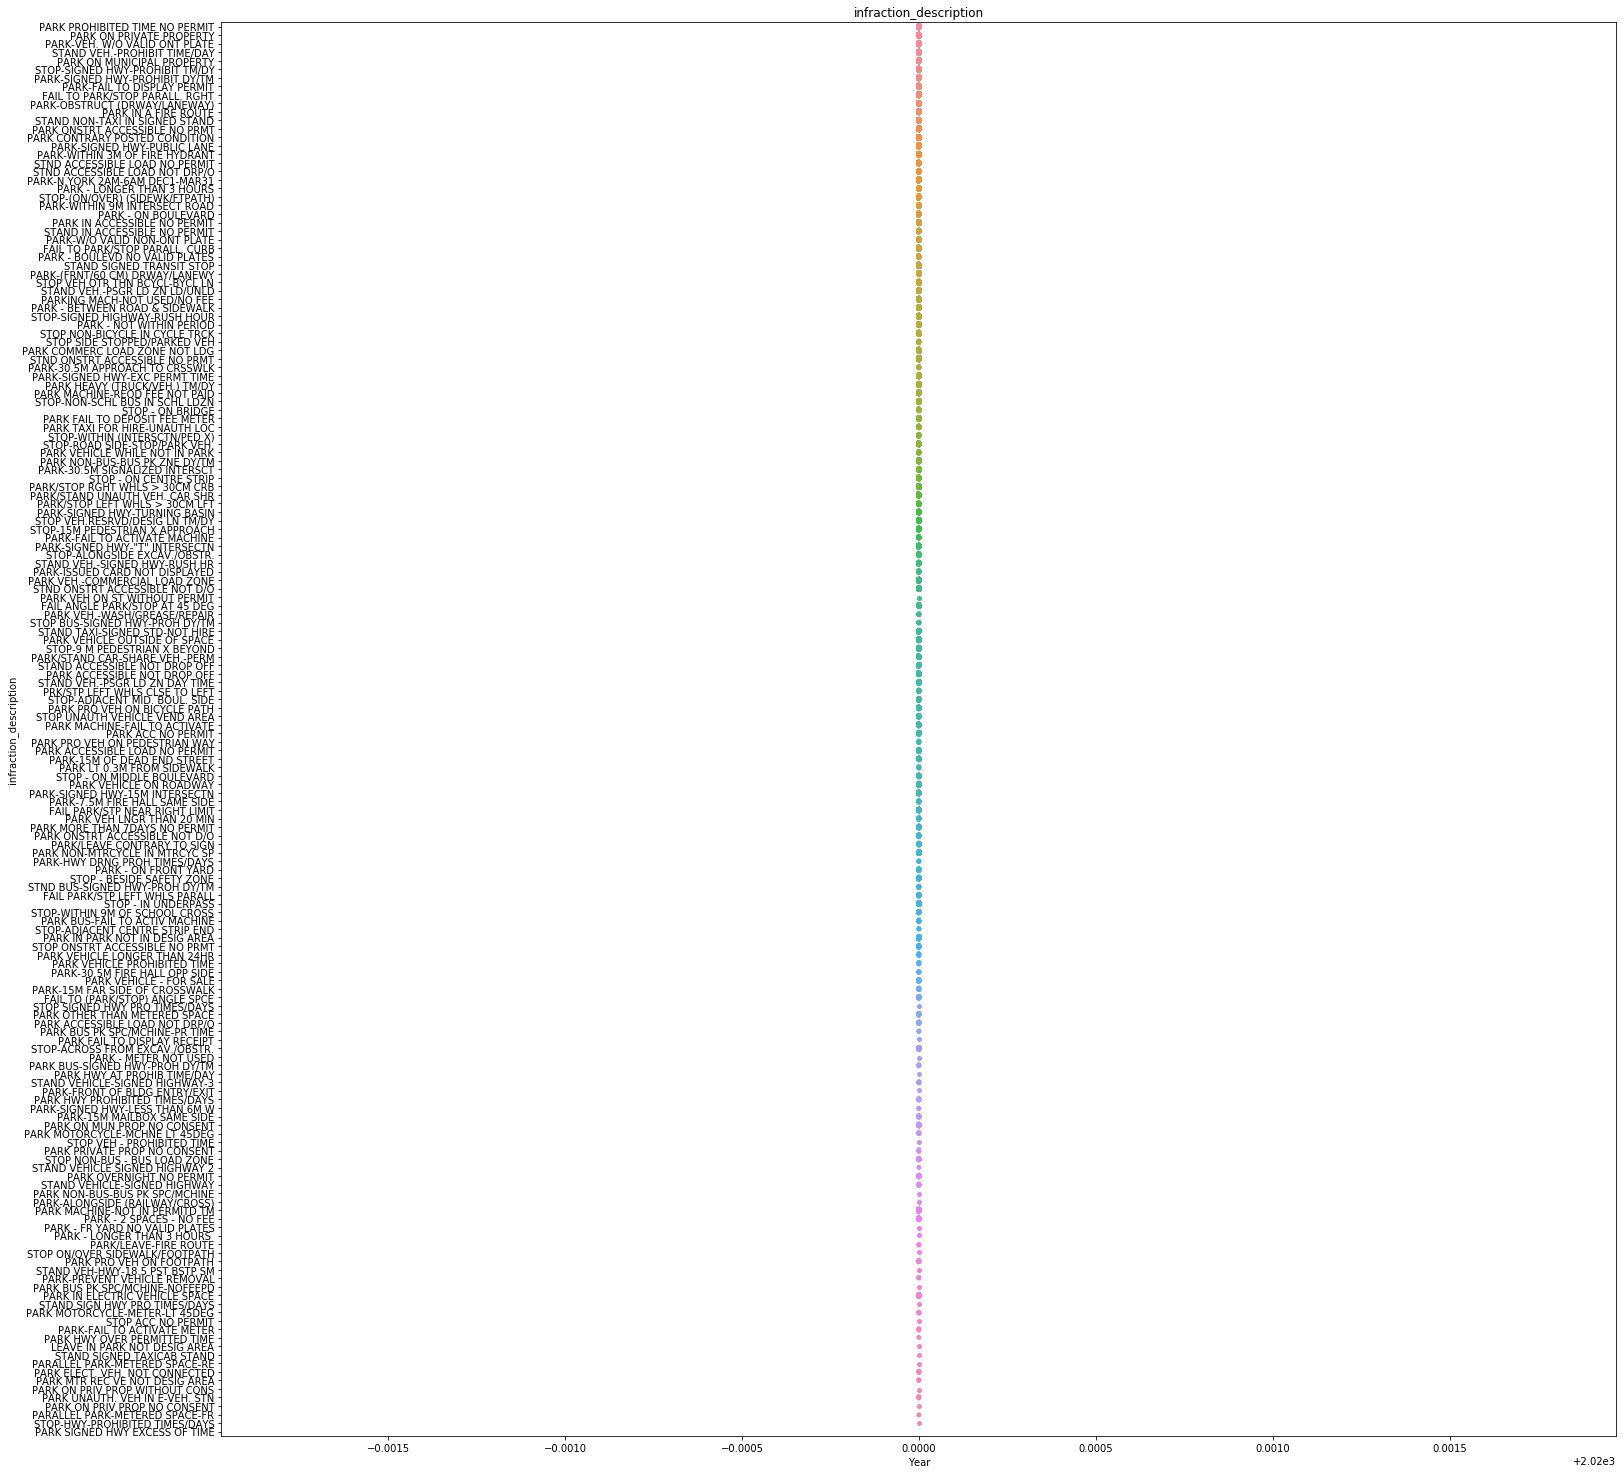

In [37]:
#Distribution of infractions by year, but since I ahave chosed to work with 2020 data only it is givin gme one straing line pof dots
plt.rcParams['figure.figsize'] = (25,26)
plt.title('infraction_description')
#sns.scatterplot(x="Year", y="infraction_description",data = PT)
sns.stripplot(x='Year', y = 'infraction_description', data = PT)

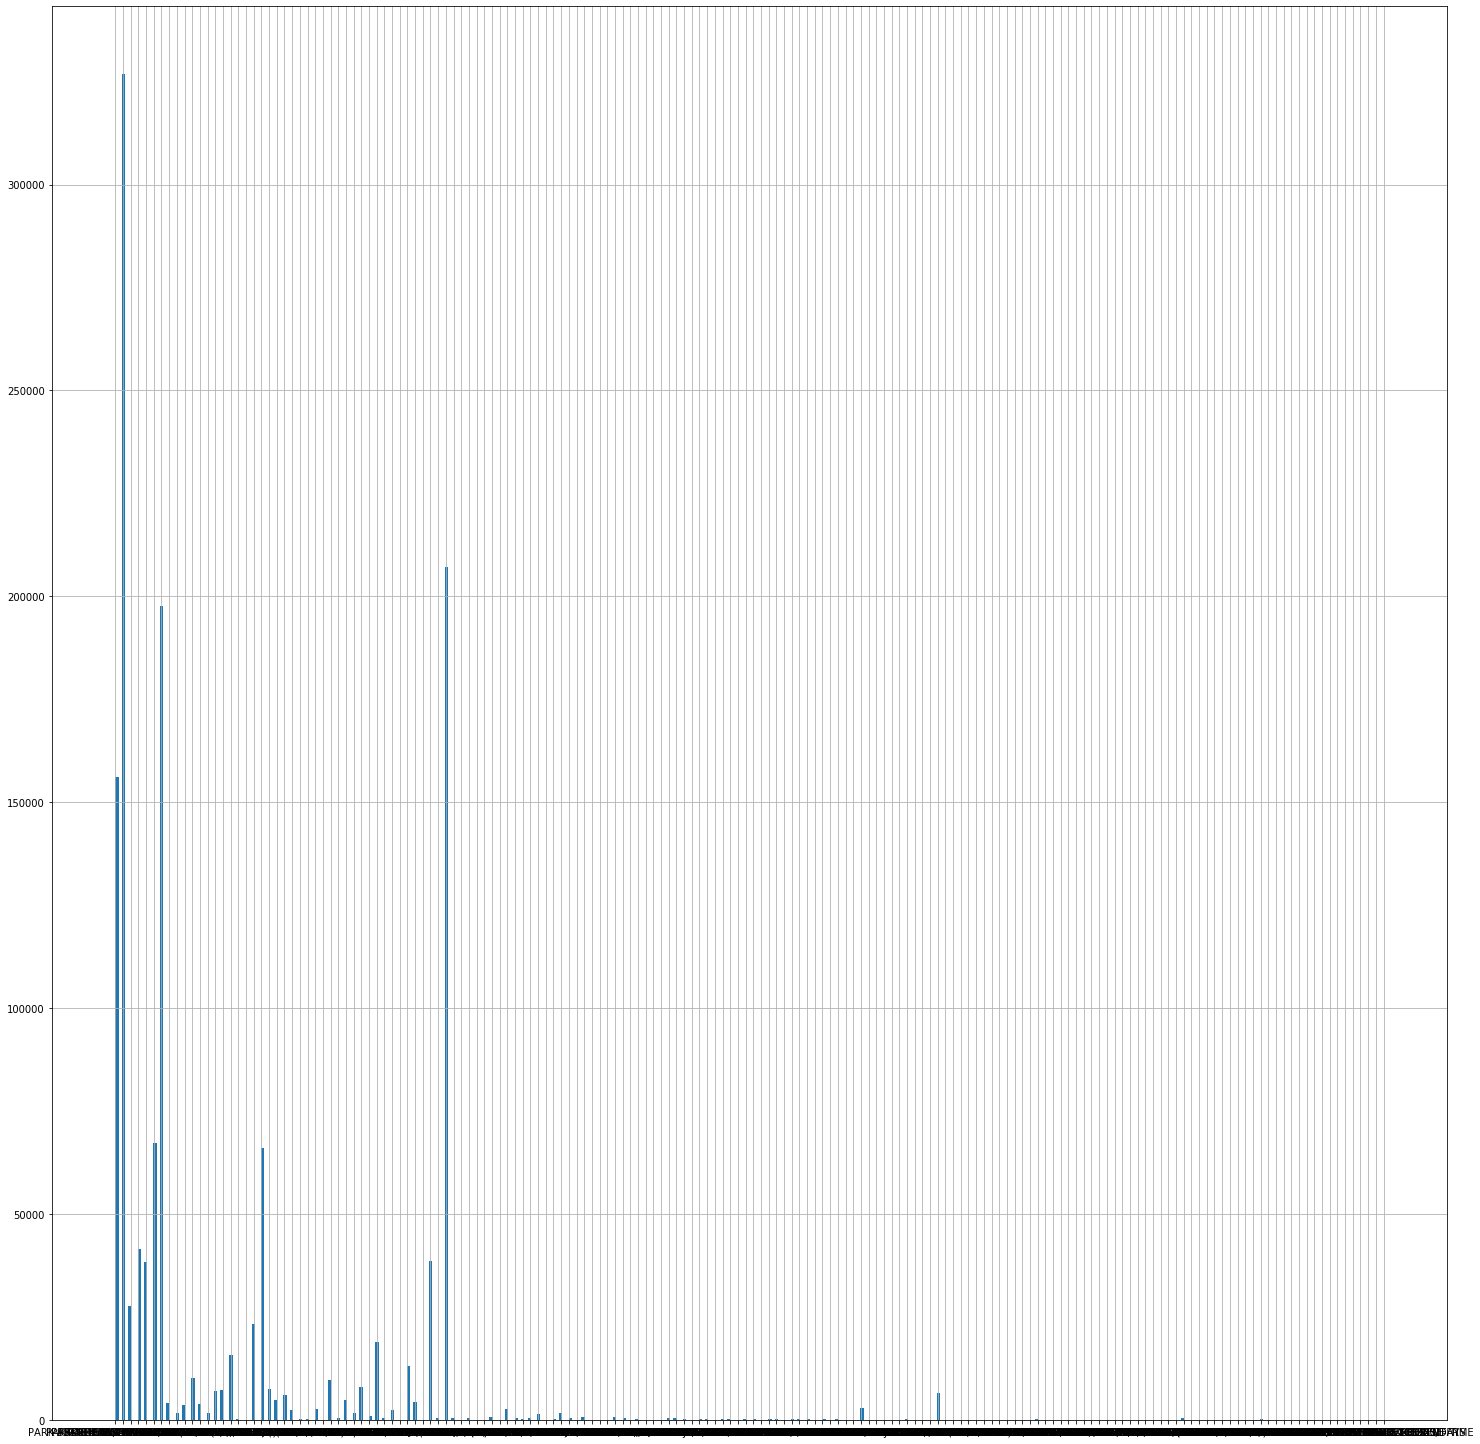

In [38]:
#in histogram it shows the spread of the different infractions by quantity
PT['infraction_description'].hist(bins = 400)

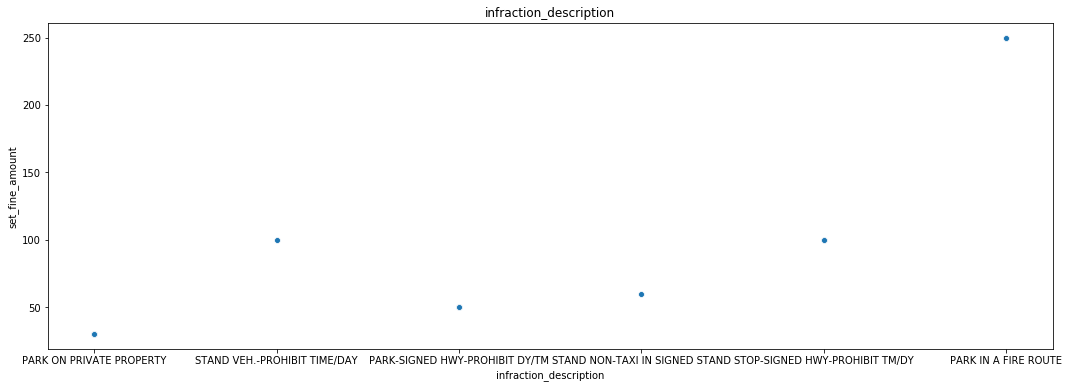

In [39]:
#Top 20 distributio of infraction chart, shows there a polynomila or Sin type of graph
plt.rcParams['figure.figsize'] = (18,6)
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import pearsonr
plt.title('infraction_description')
sns.scatterplot(x="infraction_description",y="set_fine_amount",data = T20)

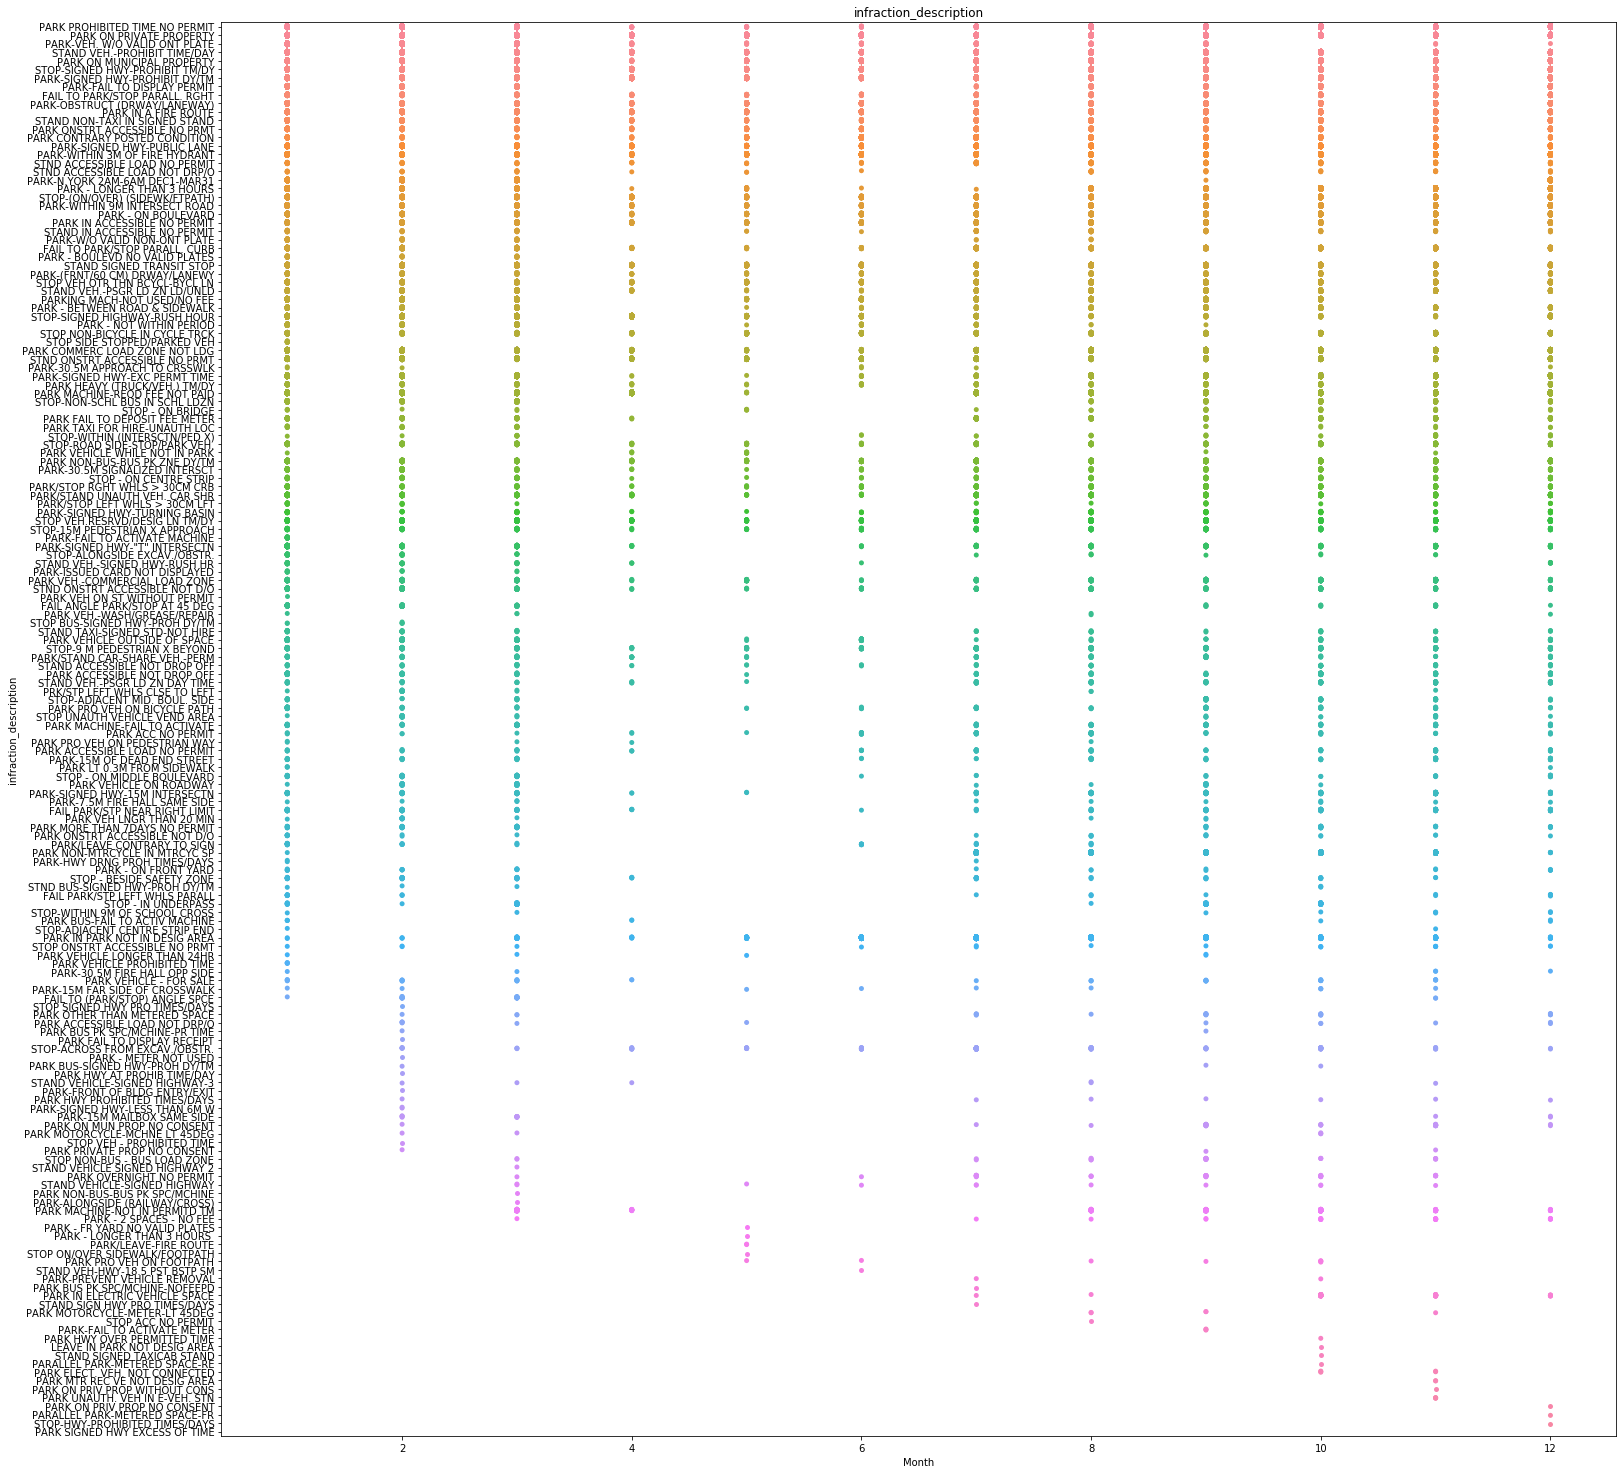

In [40]:
#Distribution of infractions by month, and t seems like as months goves by the number of infractions increases and most in december. 
#months seems to have a linear regression with the infraction
plt.rcParams['figure.figsize'] = (25,26)
plt.title('infraction_description')

sns.stripplot(x='Month', y = 'infraction_description', data = PT)

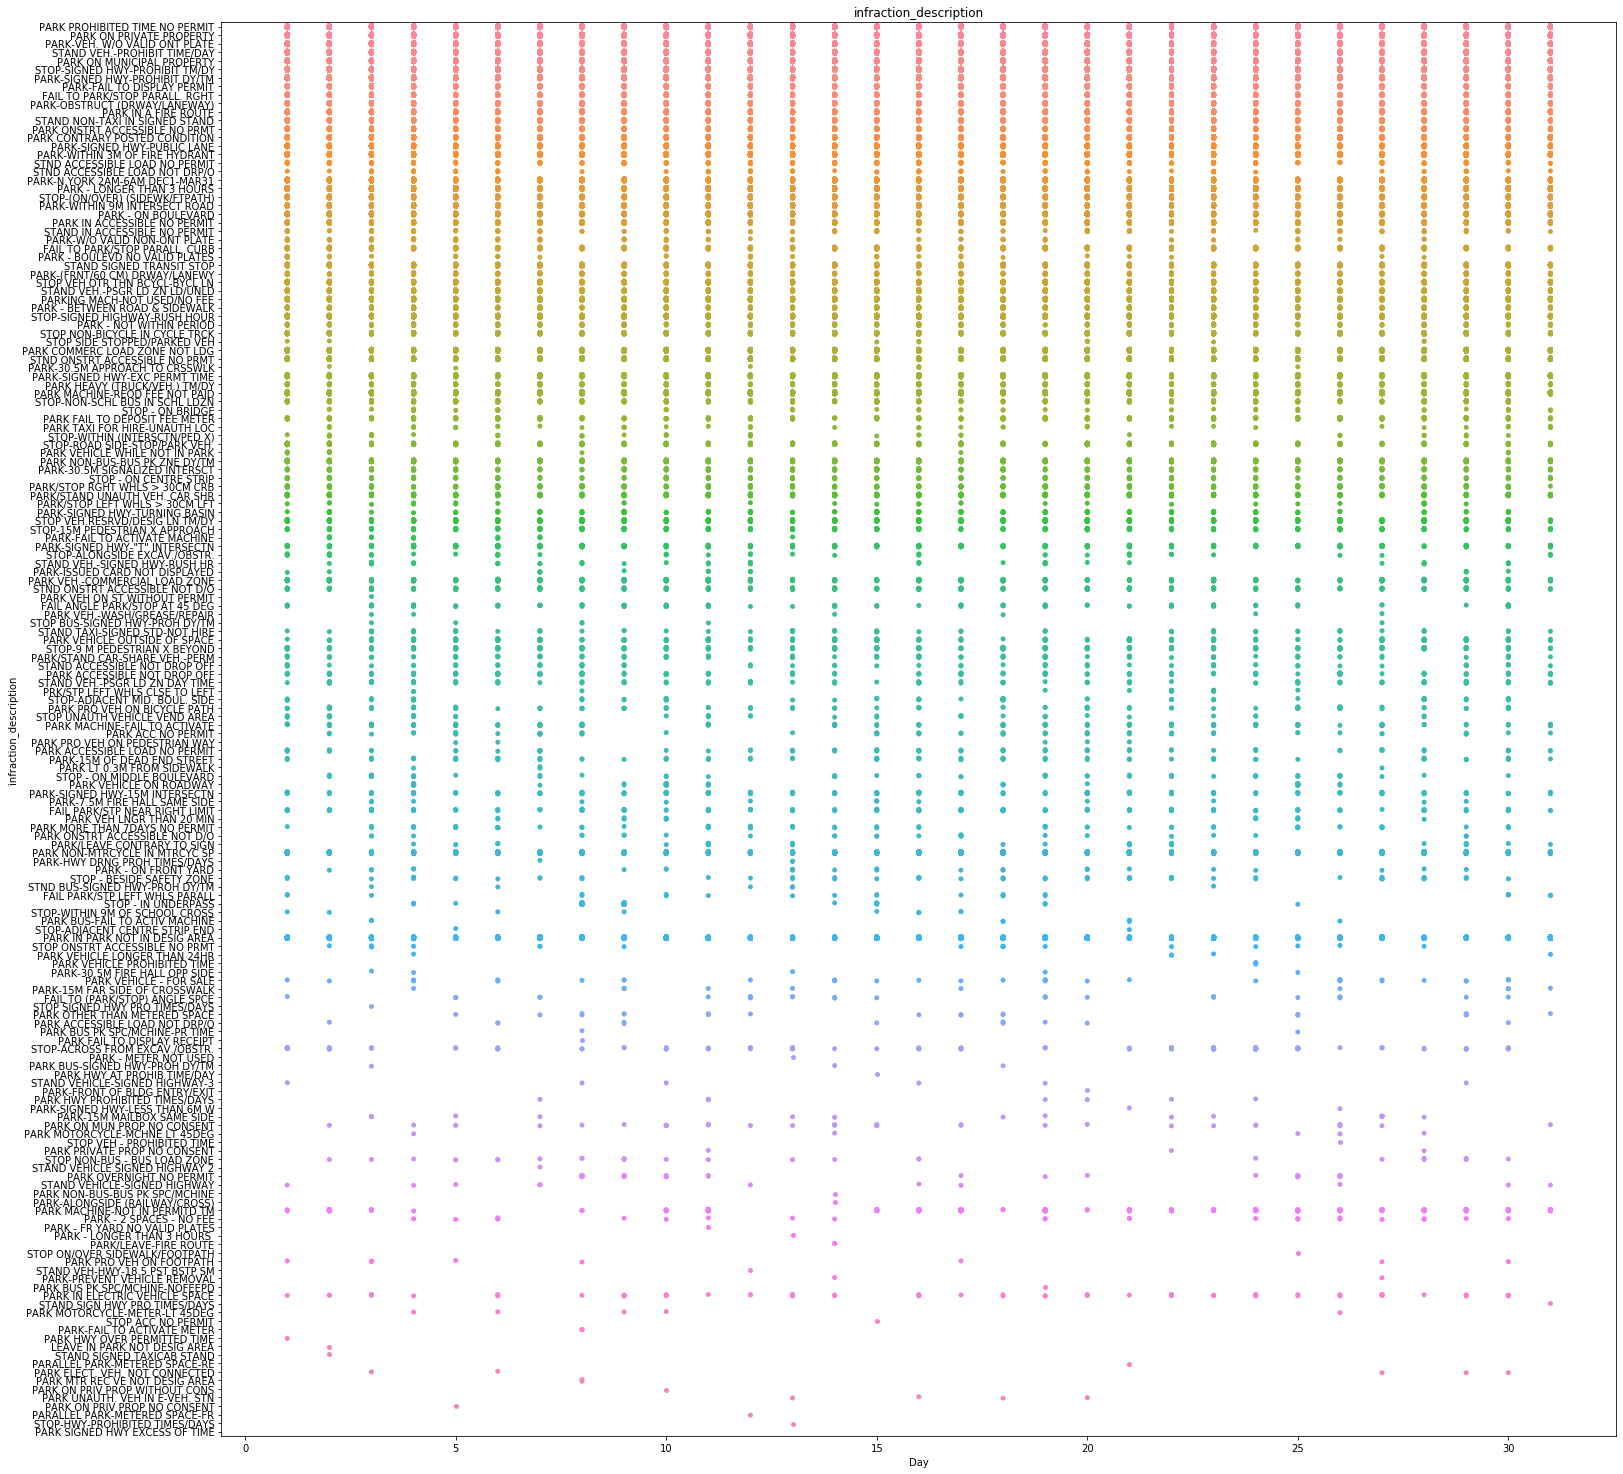

In [52]:
plt.rcParams['figure.figsize'] = (25,26)
plt.title('infraction_description')

sns.stripplot(x='Day', y = 'infraction_description', data = PT)

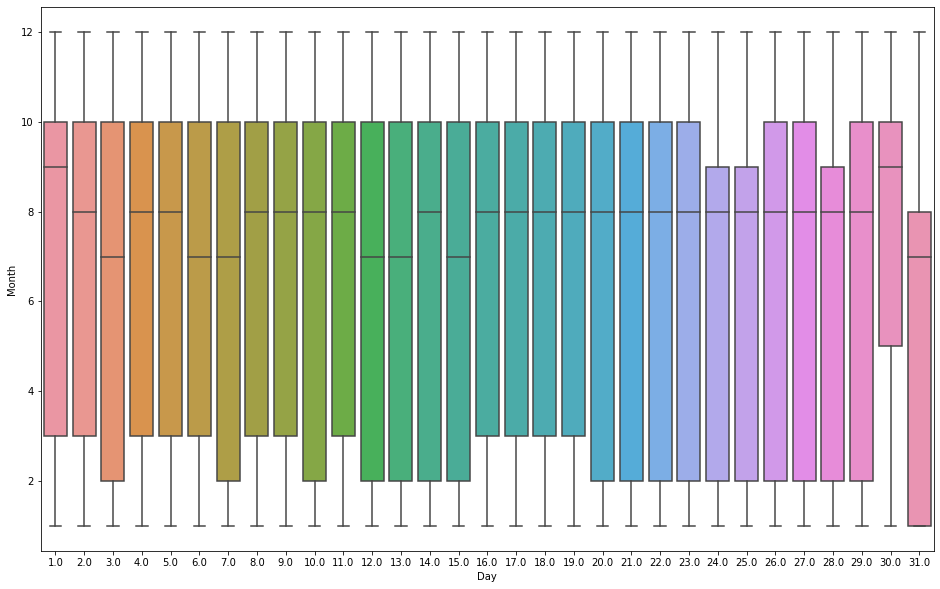

In [123]:
#box plot showing the number of cases percentile on a day in a month
plt.rcParams['figure.figsize'] = (16,10)
sns.boxplot(y= 'Month', x = 'Day', data = PT)

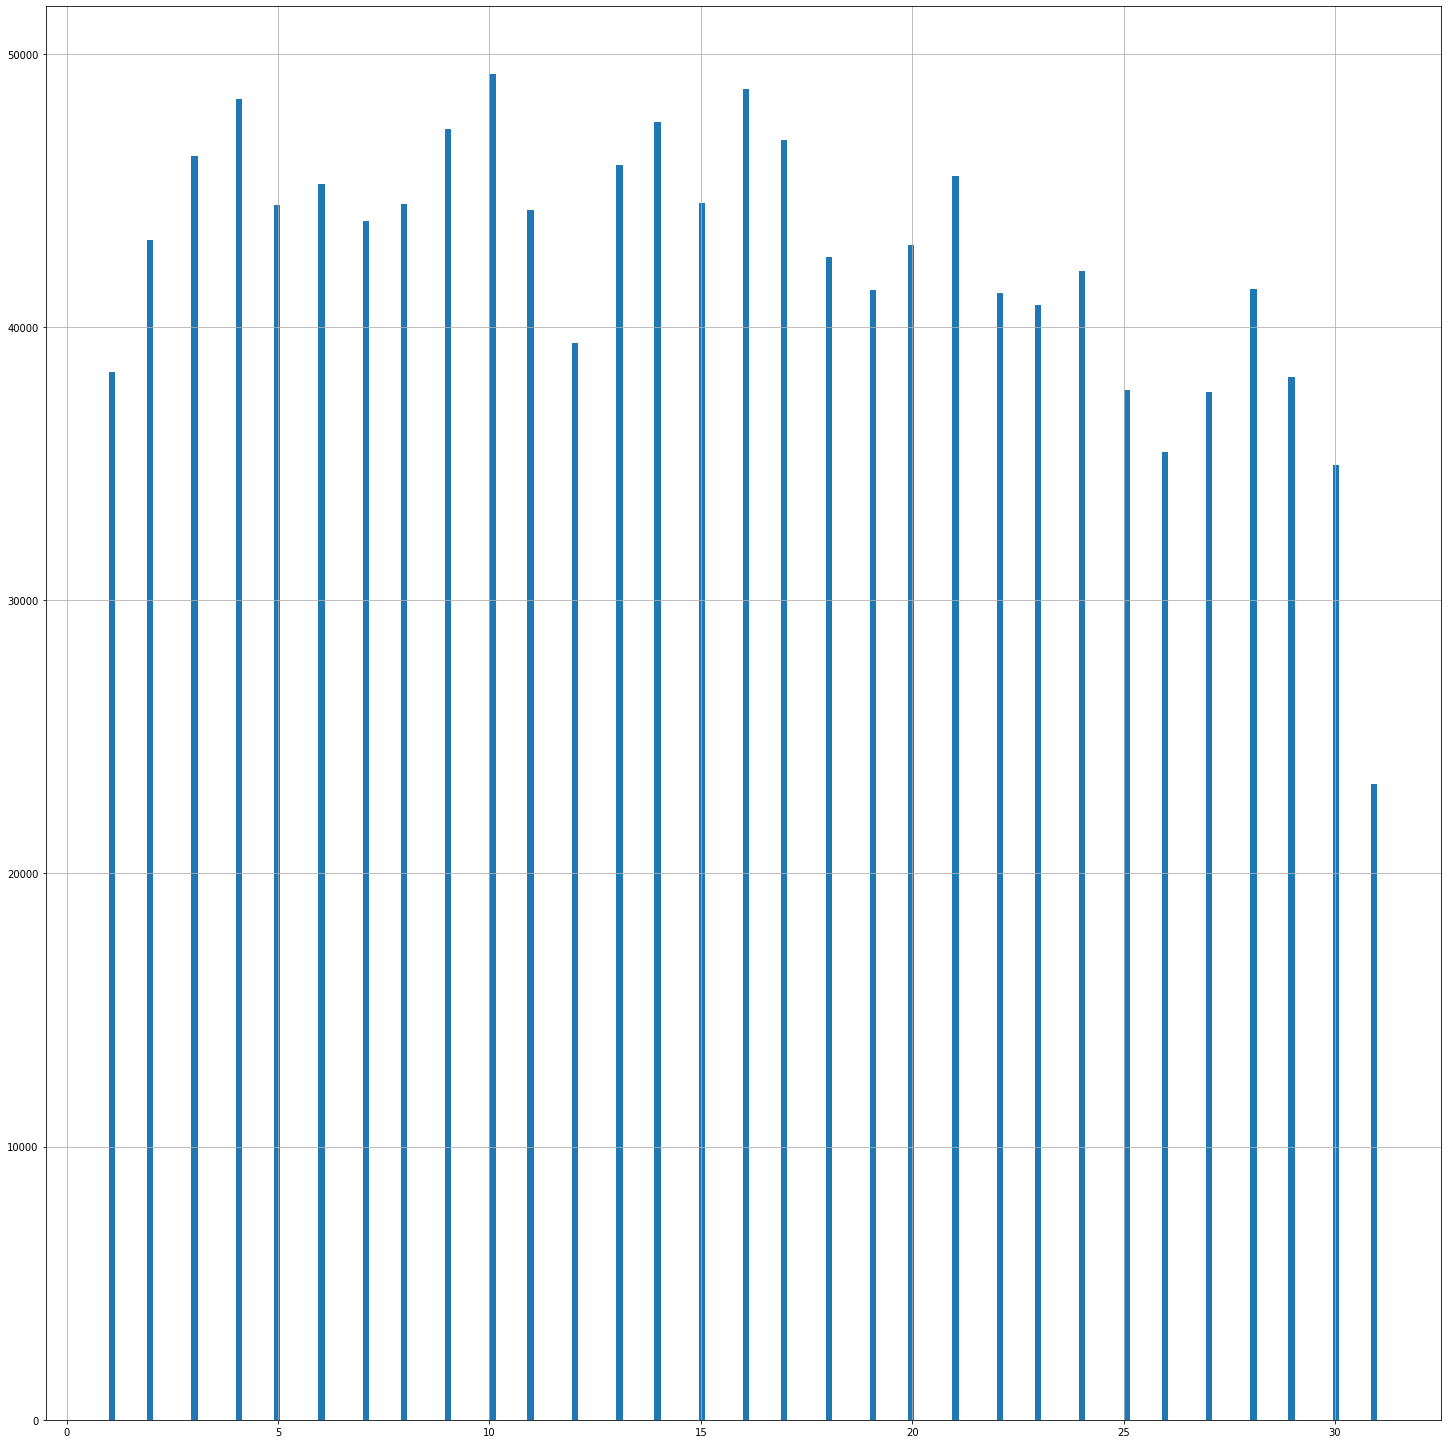

In [54]:
#Impact of day of week in all infractionn
PT['Day'].hist(bins = 200)

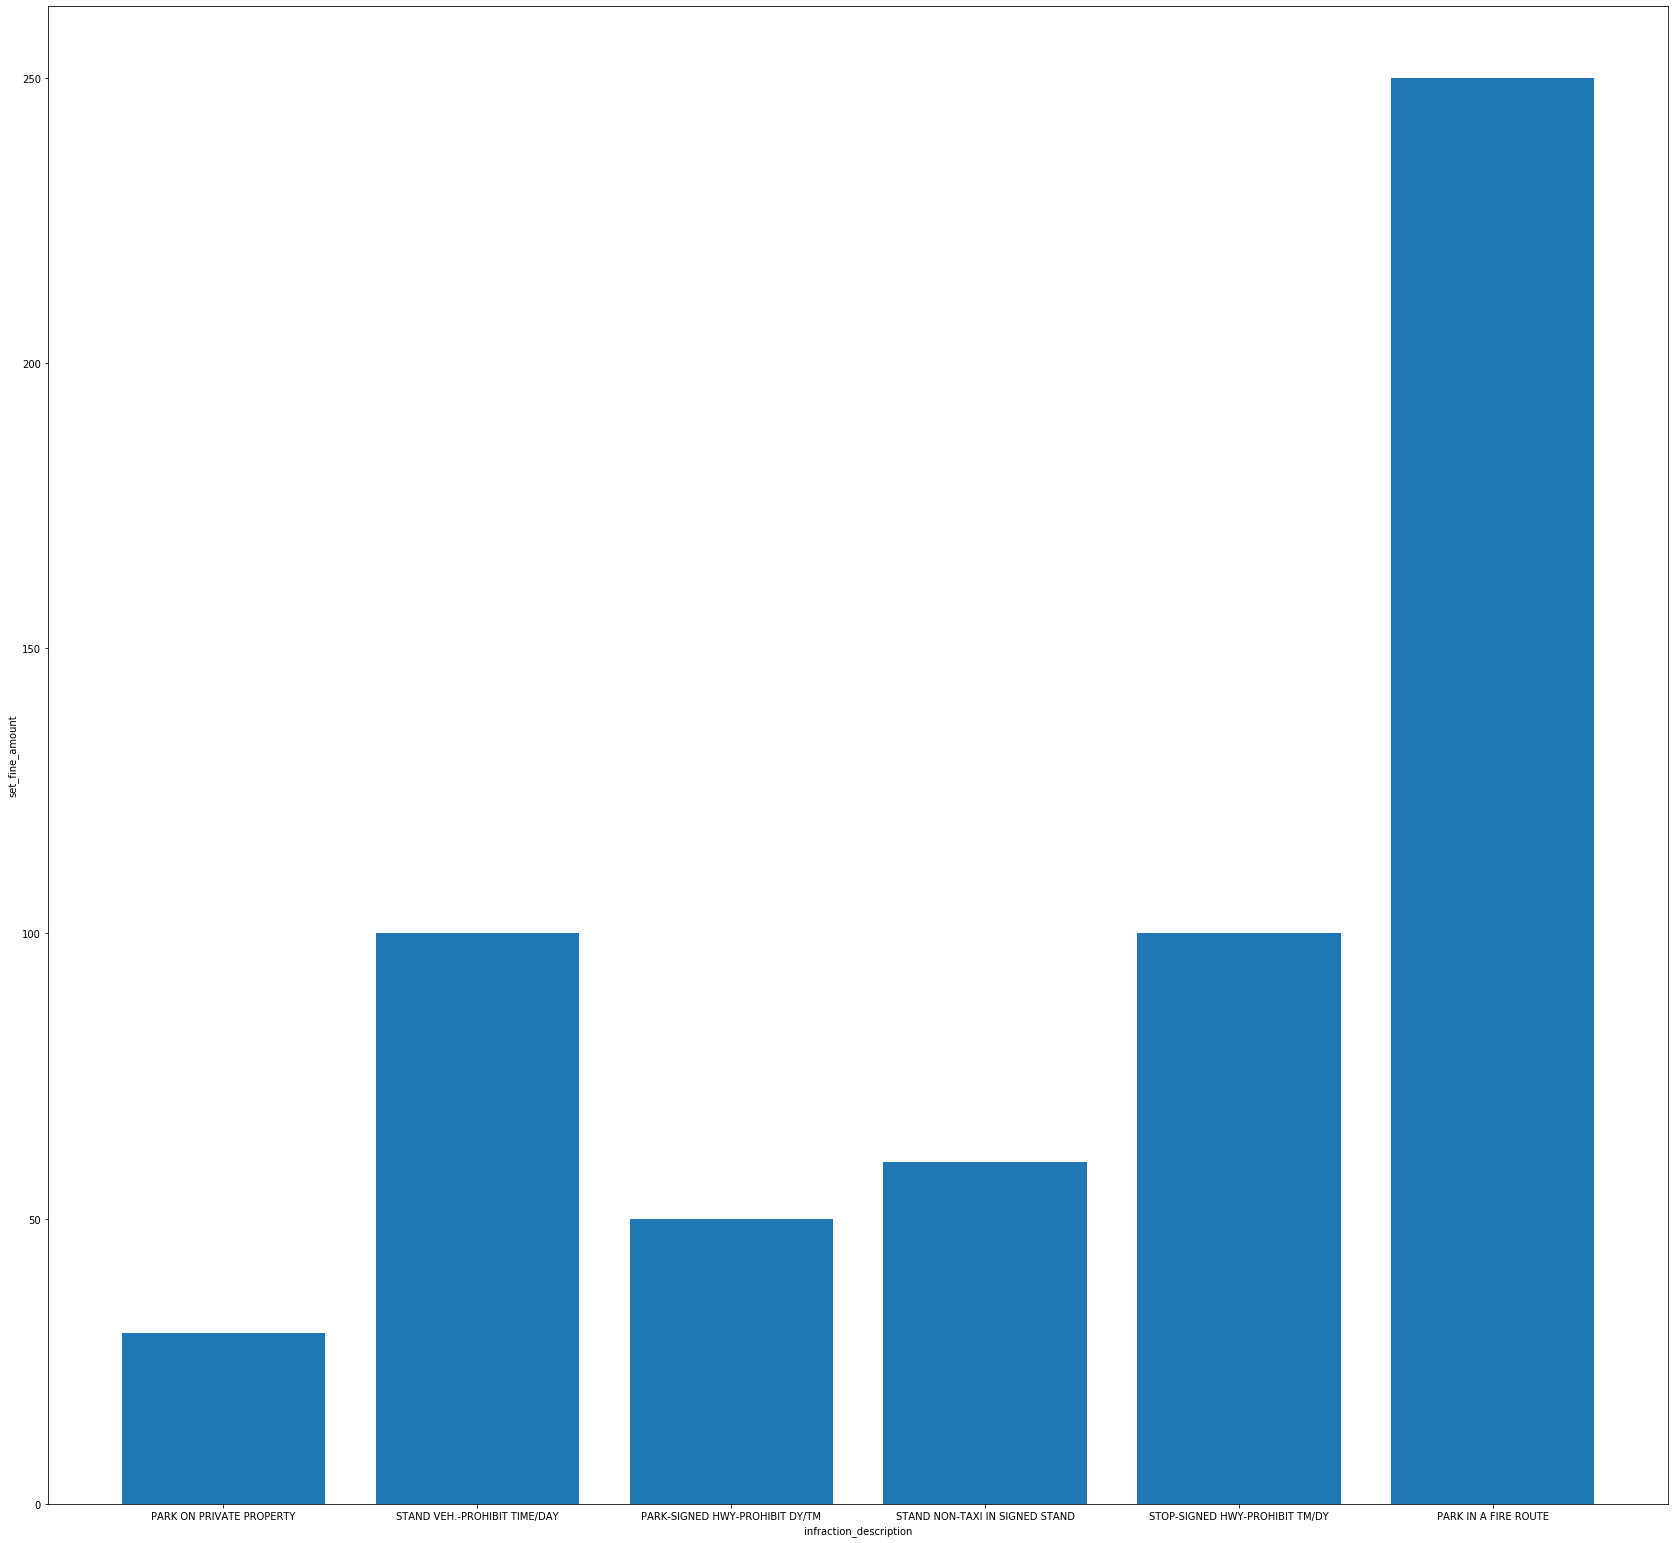

In [41]:
#Distribution of top 20 infractions by fines
fig = plt.figure()
ax = fig.add_axes([0,0,.9,.8])
x = T20['infraction_description']
y = T20['set_fine_amount']
plt.xlabel('infraction_description', size=10)
plt.ylabel('set_fine_amount', size=10)
ax.bar(x,y)
plt.show()

In [37]:
#exporting top 20 infraction locations and quantity to a file so I can load it to Carto platform for mapping
lc = PT['location2'].value_counts().head(20)

lc.to_excel(r'C:\Users\niahmad\OneDrive - Publicis Groupe\Documents\Nizam\Python\Udemy Python\Refactored_Py_DS_ML_Bootcamp-master\09-Geographical-Plotting\COT\T20_LC.xlsx', index = True)


In [38]:
#Any relevant observations in relation to socio demographic profiles
strn3 = ed['Geography']
strn4 = strn3.apply(lambda x: x.split('(')[1])
strn5 = strn4.apply(lambda x: x.split(')')[0])
strn5

0      129
1      128
2       20
3       95
4       42
      ... 
135     94
136    100
137     97
138     27
139     31
Name: Geography, Length: 140, dtype: object

In [39]:
#extracted the Hood ID from the education chart and adding it as a separate attribute so we can match it with the demographic dataset
ed['Hood'] = strn5

In [40]:
ed.head(10)

,Geography,"Total population aged 15 years and over by highest certificate, diploma or degree","No certificate, diploma or degree",High school diploma or equivalent,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,"University certificate, diploma or degree above bachelor level",Hood
0,TOR - HOOD - Agincourt North (129) ( 23.7%),25765,5965,7480,12320,1015,3465,1805,6030,4350,1680,129
1,TOR - HOOD - Agincourt South-Malvern West (128...,18595,4065,4840,9695,900,2730,1150,4920,3230,1690,128
2,TOR - HOOD - Alderwood (20) ( 25.4%),10210,2290,2560,5360,800,2090,455,2015,1390,625,20
3,TOR - HOOD - Annex (95) ( 27.9%),25185,1685,4275,19225,665,2580,1125,14855,7655,7195,95
4,TOR - HOOD - Banbury-Don Mills (42) ( 23.6%),22855,2300,4715,15840,1170,3385,1400,9885,5665,4220,42
5,TOR - HOOD - Bathurst Manor (34) ( 21.9%),12830,2450,2885,7495,710,2210,565,4010,2220,1795,34
6,TOR - HOOD - Bay Street Corridor (76) ( 26.7%),17795,695,3210,13885,335,1245,885,11410,5360,6055,76
7,TOR - HOOD - Bayview Village (52) ( 28.7%),15215,1260,2870,11080,575,1965,975,7570,4395,3175,52
8,TOR - HOOD - Bayview Woods-Steeles (49) ( 27.8%),11525,1420,2430,7685,305,1555,925,4900,2945,1950,49
9,TOR - HOOD - Bedford Park-Nortown (39) ( 28.1%),18225,1890,3730,12600,565,2055,1115,8870,4765,4100,39


In [41]:
dm1 = dm.drop(0)
dm1.columns


Index(['Hood', 'Total Population', 'Child0-14', 'Youth15-24', 'Seniors65',
       '  Total visible minority population', '    South Asian', '    Chinese',
       '    Black', '    Filipino', '    Latin American', '    Arab',
       '    Southeast Asian', '    West Asian', '    Korean', '    Japanese',
       '    Visible minority, n.i.e.', '    Multiple visible minorities',
       '  Not a visible minority', 'Total - Mobility status 5 years ago',
       '  Non-movers', '  Movers',
       'Total recent immigrant population in private households by selected places of birth',
       'Middle East/Western Asia', 'Eastern', 'South East', 'Southern',
       '    Other places of birth in Asia', 'Americas w/o USA', '  Europe',
       '  Africa',
       'Total population aged 15 years and over by labour force status ',
       '  In the labour force ', '    Unemployed', '  Not in the labour force',
       '  No certificate, diploma or degree',
       '    College, CEGEP or other non-university ce

In [42]:
dm1

,Hood,Total Population,Child0-14,Youth15-24,Seniors65,Total visible minority population,South Asian,Chinese,Black,Filipino,...,Total number of private households by tenure,Owner,Renter,% of owner households spending 30% or more of household total income on shelter costs,Major repairs needed,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,Median after-tax household income $
1,1,34100,5970,5405,4305,26475,13080,695,6385,1470,...,10130,7075,3050,27.9,415,945,72820,10130,66241,59703
2,2,32790,7665,5020,2945,28175,12720,200,8285,680,...,9610,4540,5070,33.3,1100,921,57411,9610,49934,46986
3,3,10140,1825,1350,1745,6285,2285,105,1530,485,...,3225,2080,1145,25.1,170,887,70838,3225,62042,57522
4,4,10485,1585,1315,1915,4425,1435,200,1025,245,...,3945,2010,1935,19.7,340,857,69367,3945,56545,51194
5,5,9550,2110,1380,1095,5510,925,120,2150,605,...,3225,1910,1315,34.3,320,966,61196,3225,50846,49425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,26550,4945,3925,3605,15835,4470,820,5430,2100,...,9700,5875,3820,24.9,1070,686,65871,9695,49713,46803
137,137,53350,10300,7580,7445,38715,20985,4105,5170,3785,...,18380,9905,8475,26.6,1640,840,63186,18380,52018,47908
138,138,22830,4555,3080,3160,16160,6675,975,3770,2310,...,8060,3585,4475,32.4,810,874,57357,8055,46495,42790
139,139,16615,3490,2460,2010,11455,5115,415,2855,1005,...,5905,2715,3195,34,1010,833,61631,5910,42131,40181


In [43]:
#merging the Education dataset and Demographic dataset to run some EDA
dm2 = pd.merge(ed, dm[['Hood','Total Population', 'Child0-14', 'Youth15-24', 'Seniors65',
       '  Total visible minority population', '    South Asian', '    Chinese',
       '    Black', '    Filipino', '    Latin American', '    Arab',
       '    Southeast Asian', '    West Asian', '    Korean', '    Japanese',
       '    Visible minority, n.i.e.', '    Multiple visible minorities',
       '  Not a visible minority', 'Total - Mobility status 5 years ago',
       '  Non-movers', '  Movers',
       'Total recent immigrant population in private households by selected places of birth',
       'Middle East/Western Asia', 'Eastern', 'South East', 'Southern',
       '    Other places of birth in Asia', 'Americas w/o USA', '  Europe',
       '  Africa',
       'Total population aged 15 years and over by labour force status ',
       '  In the labour force ', '    Unemployed', '  Not in the labour force',
       '  No certificate, diploma or degree',
       '    College, CEGEP or other non-university certificate or diploma',
       '    University certificate or diploma below bachelor level',
       'Total number of private households by tenure', '  Owner', '  Renter',
       '  % of owner households spending 30% or more of household total income on shelter costs',
       '  Major repairs needed',
       '  Average monthly shelter costs for rented dwellings ($)',
       '  Average after-tax family income $ (Family income in 2010 of economic families)',
       'Household income in 2010 of private households',
       '  Median household total income $',
       '  Median after-tax household income $']], on='Hood')
dm2.head()

,Geography,"Total population aged 15 years and over by highest certificate, diploma or degree","No certificate, diploma or degree_x",High school diploma or equivalent,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma_x",University certificate or diploma below bachelor level_x,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,...,Total number of private households by tenure,Owner,Renter,% of owner households spending 30% or more of household total income on shelter costs,Major repairs needed,Average monthly shelter costs for rented dwellings ($),Average after-tax family income $ (Family income in 2010 of economic families),Household income in 2010 of private households,Median household total income $,Median after-tax household income $
0,TOR - HOOD - Agincourt North (129) ( 23.7%),25765,5965,7480,12320,1015,3465,1805,6030,4350,...,9145,7335,1810,32,425,976,67622,9145,60162,55893
1,TOR - HOOD - Agincourt South-Malvern West (128...,18595,4065,4840,9695,900,2730,1150,4920,3230,...,6885,5250,1635,32.3,590,971,68465,6885,59013,53886
2,TOR - HOOD - Alderwood (20) ( 25.4%),10210,2290,2560,5360,800,2090,455,2015,1390,...,4665,3635,1030,18.2,375,984,83584,4660,71585,61402
3,TOR - HOOD - Annex (95) ( 27.9%),25185,1685,4275,19225,665,2580,1125,14855,7655,...,15550,5770,9780,29.3,1110,1237,141111,15545,57825,49912
4,TOR - HOOD - Banbury-Don Mills (42) ( 23.6%),22855,2300,4715,15840,1170,3385,1400,9885,5665,...,11770,7035,4735,25.8,570,1213,115239,11770,70039,60203


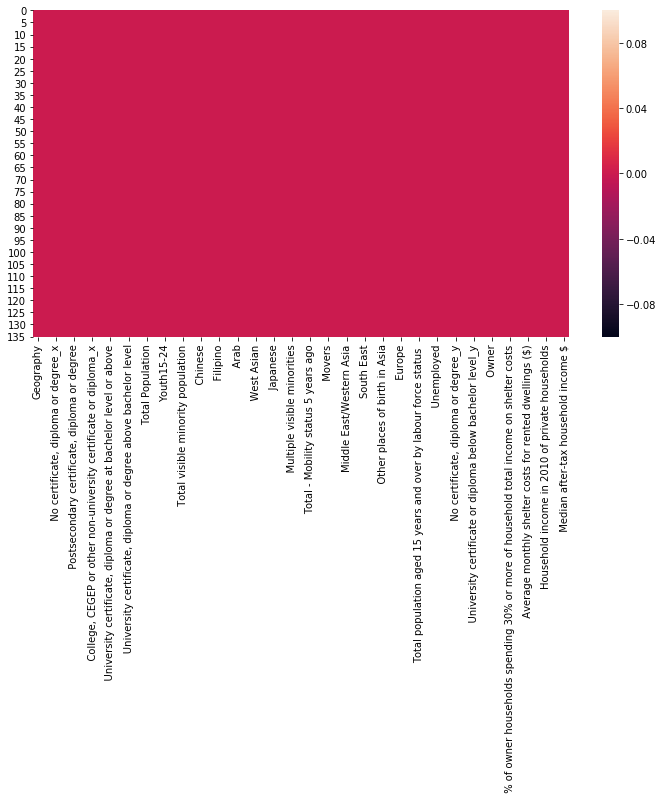

In [49]:
plt.rcParams['figure.figsize'] = (12,6)
sns.heatmap(dm2.isnull())

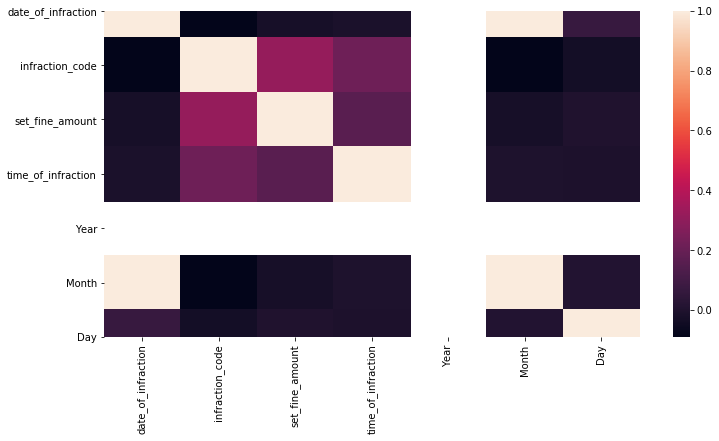

In [50]:
sns.heatmap(PT.corr())

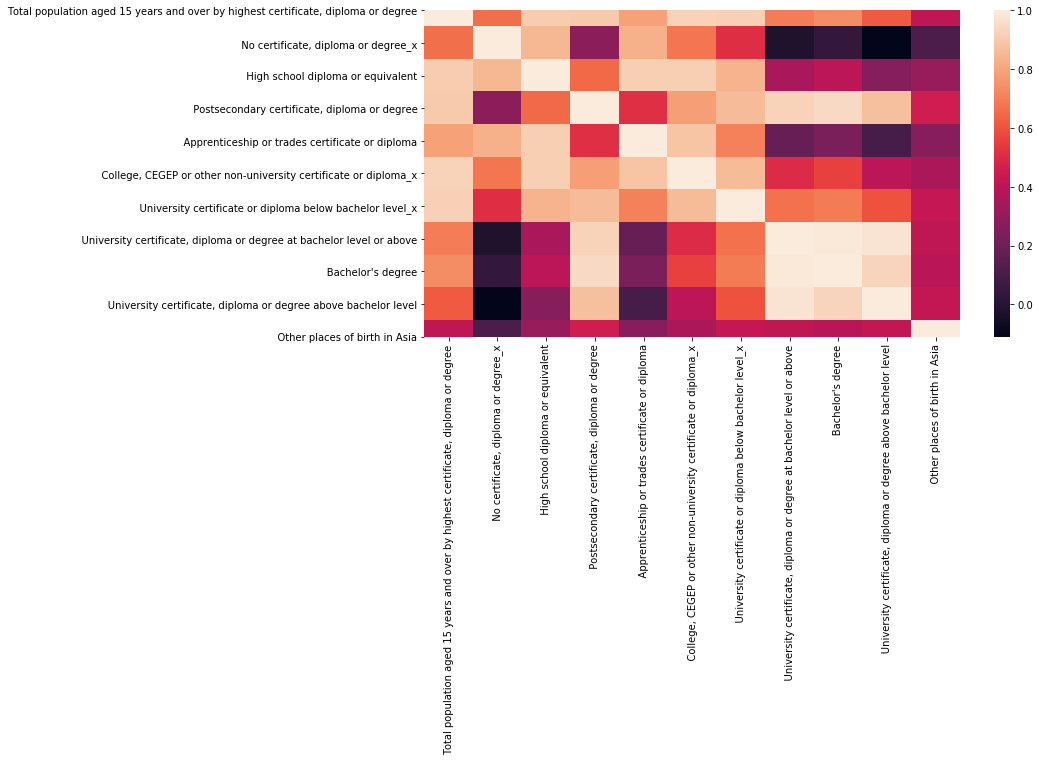

In [51]:
sns.heatmap(dm2.corr())
#Its seems like there is a strong coorelation between bachelors degree and Postsecondary certificate, diploma or degree. People finishing up bachelors are going for postsecondary degrees

KeyError: 2